<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Data2020/BTC_Robustness_Clustering60Jan13_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')

Mounted at /content/drive
Authenticated


In [2]:
import pandas as pd 
import numpy as np

In [3]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/btc_Kmeans_2020_12_31.csv',index_col='Unnamed: 0')
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2020-12-27,1049825.0,148.0,193716651.0,1.308896e+06,3.033870,4.911576e+11,1.618915e+11,1.866826e+13,0.000295,7.792538,0.000158,4.162860,89.698259,2.370802e+06,1.373446e+08,925.0,1.816875,2.444854e+07,925.0,2.444854e+07,76.839437,114.994093,1.0,26430.856597,261.737332,54.551925,1.858273e+07,2.056073e+07,1.449817e+07,304240.0,808638.0,241838.497017,6.391999e+09,0.657102,17367.771562,0.005215,137.846432,531357.733666,1.404424e+10,0.027924,0.034667,0.034255,4.905674e+10,1.751811,5.544874e+10,8.238012,2.681934e+07,2.100175e+10,50.174128,1.102133e+12,2.398156,0.017810,0.121826,0.112338,0.063885,0.089066,0.123253,0.132847,0.090978,0.028995,0.118794,0.100206,0.595074,0.471821,0.338974,0.247995,0.219001,0.100206,279.837598,94.450699,0.034667,0.034255,0.030030,0.027924,487.366929,54.231945,NaN,NaN,NaN,54.551925,98.872856,146.386991,189.052387,NaN,NaN,NaN,NaN
2020-12-28,1154354.0,160.0,206766595.0,1.292291e+06,3.033361,5.024921e+11,1.656552e+11,1.859959e+13,0.000327,8.834168,0.000164,4.436346,102.752936,2.778372e+06,1.479345e+08,1000.0,1.964065,2.703935e+07,1000.0,2.703935e+07,46.737221,115.311281,1.0,27039.349020,265.812917,52.374044,1.858373e+07,2.056098e+07,1.449831e+07,314503.0,874761.0,397621.711422,1.075143e+10,0.809730,21894.585318,0.005513,149.061442,708320.652738,1.915253e+10,0.027950,0.034447,0.034285,4.526595e+10,1.754172,5.601738e+10,8.071835,2.981772e+07,2.103157e+10,46.170214,1.332533e+12,2.029169,0.021149,0.127496,0.111604,0.063451,0.083734,0.121085,0.132213,0.091246,0.028996,0.118805,0.100221,0.592565,0.471481,0.339268,0.248022,0.219026,0.100221,272.669458,99.165301,0.034447,0.034285,0.030060,0.027950,474.438581,56.992307,NaN,NaN,NaN,52.374044,100.659837,149.414196,192.591228,NaN,NaN,NaN,NaN
2020-12-29,1146131.0,152.0,194179955.0,1.277500e+06,3.006909,5.060833e+11,1.683068e+11,1.859959e+13,0.000313,8.530911,0.000164,4.470274,104.816233,2.854272e+06,1.405378e+08,950.0,1.865880,2.586964e+07,950.0,2.586964e+07,54.785860,114.333016,1.0,27231.203455,276.673228,49.697118,1.858468e+07,2.056122e+07,1.449554e+07,334580.0,924443.0,339224.096073,9.237480e+09,0.765763,20852.655461,0.005631,153.351433,707904.496552,1.927709e+10,0.027902,0.034408,0.034289,5.128744e+10,1.754900,6.052492e+10,8.052861,2.872392e+07,2.106029e+10,48.270913,1.313616e+12,2.072995,0.019785,0.135661,0.105108,0.064458,0.082931,0.120875,0.131812,0.091394,0.028982,0.118768,0.100227,0.592058,0.471183,0.339371,0.247977,0.218996,0.100227,271.682580,100.231688,0.034408,0.034289,0.030010,0.027902,473.544137,57.505101,NaN,NaN,NaN,49.697118,100.180921,152.787915,199.428676,NaN,NaN,NaN,NaN
2020-12-30,1221579.0,172.0,215838093.0,1.254873e+06,3.148488,5.360990e+11,1.702719e+11,1.859959e+13,0.000315,9.091743,0.000171,4.940794,107.456738,3.099548e+06,1.590296e+08,1075.0,2.111160,3.100796e+07,1075.0,3.100796e+07,55.434481,119.111340,1.0,28844.613678,30

In [7]:
import matplotlib.pyplot as plt
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-bright')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [8]:
df['PU_future60d']=df['PU Ratio'].shift(-60)
df['NVT_future60d']=df['NVTAdj90'].shift(-60)
df['PM_future60d']=df['PM'].shift(-60)


In [9]:
df_60=df[['PU Ratio','PU_future60d','NVTAdj90','NVT_future60d','future60d_ROI','PM','PM_future60d']]

In [10]:
df_60=df_60.dropna()

In [11]:
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d
2010-10-15,0.463068,0.845730,154.643925,127.697990,134.942857,30.998689,20.276851
2010-10-16,0.418963,0.790388,144.681892,123.638562,137.623762,11.602674,20.538081
2010-10-17,0.434969,0.848217,147.263082,128.368660,145.058824,18.085074,27.464631
2010-10-18,0.432914,0.783520,145.972987,124.403714,136.968570,11.418262,38.393389
2010-10-19,0.391364,0.752000,137.869691,122.980495,147.065731,4.899486,31.191718


In [12]:
df_60.tail()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d
2020-10-28,26.714280,94.450699,90.922497,114.994093,98.872856,1.988634,2.398156
2020-10-29,27.221458,99.165301,91.855084,115.311281,100.659837,1.709751,2.029169
2020-10-30,27.407677,100.231688,92.291101,114.333016,100.180921,1.674195,2.072995
2020-10-31,28.088775,113.942405,93.433150,119.111340,108.909435,1.802014,1.932954
2020-11-01,27.658374,115.804956,93.290968,118.111923,111.275271,1.705584,2.036377


In [13]:
from sklearn.cluster import KMeans

In [14]:
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_60[['PU Ratio','PU_future60d']])
labels60 = model.predict(df_60[['PU Ratio','PU_future60d']])
labels60.reshape(-1,1)
df_60['labels60']=labels60
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d,labels60
2010-10-15,0.463068,0.845730,154.643925,127.697990,134.942857,30.998689,20.276851,0
2010-10-16,0.418963,0.790388,144.681892,123.638562,137.623762,11.602674,20.538081,0
2010-10-17,0.434969,0.848217,147.263082,128.368660,145.058824,18.085074,27.464631,0
2010-10-18,0.432914,0.783520,145.972987,124.403714,136.968570,11.418262,38.393389,0
2010-10-19,0.391364,0.752000,137.869691,122.980495,147.065731,4.899486,31.191718,0


In [15]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,18.654291,19.748019
1,439.885527,111.366878
2,98.615611,97.838443
3,97.563292,439.885527


In [16]:
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

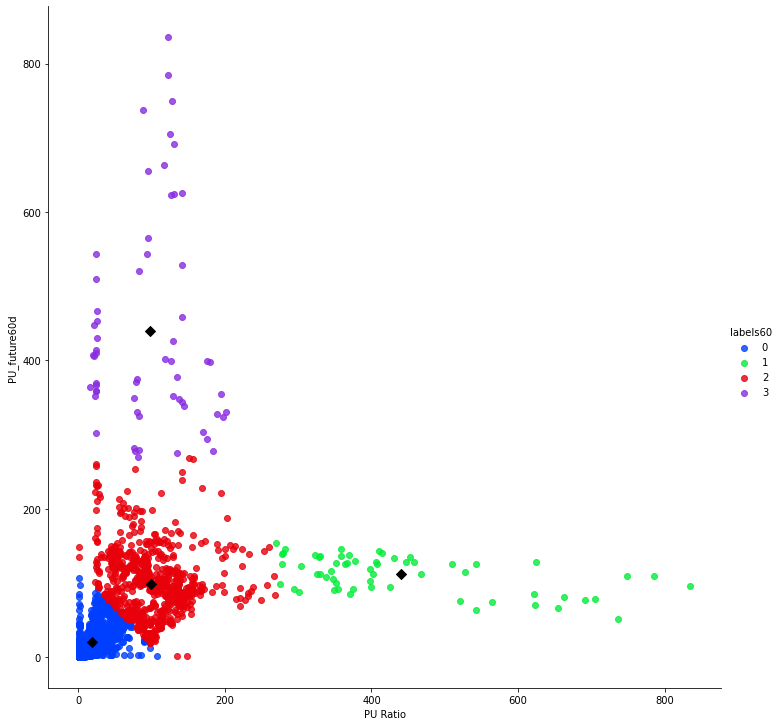

In [32]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future60d', data=df_60, hue='labels60', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('PU60_full')

In [33]:
df_60_ROI=df_60[['future60d_ROI','labels60']].groupby('labels60', as_index=False).agg(['min', 'max','mean','std'])
df_60_ROI.columns = ["_".join(x) for x in df_60_ROI.columns.ravel()]
df_60_ROI.index.name=None
df_60_ROI.head()

,future60d_ROI_min,future60d_ROI_max,future60d_ROI_mean,future60d_ROI_std
0,-80.651775,3022.836529,53.547982,188.368627
1,-59.784966,20.531380,-25.633132,19.805913
2,-72.993433,3854.704094,27.919422,211.739849
3,91.156702,834.920849,307.194035,239.541938


In [34]:
df60_PU=df_60[['PU Ratio', 'PU_future60d','labels60']].groupby('labels60').agg(['min', 'max','mean','std'])
df60_PU=df60_PU.transpose()
df60_PU

labels60                    0           1           2           3
PU Ratio     min     0.331046  270.195448    0.686384   16.038353
             max   106.877612  835.348317  267.942508  201.104188
             mean   18.702652  439.885527   98.853864   97.563292
             std    15.873590  145.070900   42.881490   57.018902
PU_future60d min     0.331046   51.859919    1.740238  270.195448
             max   106.877612  153.308506  267.942508  835.348317
             mean   19.813686  111.366878   98.005619  439.885527
             std    16.679198   24.436796   44.820224  145.070900

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

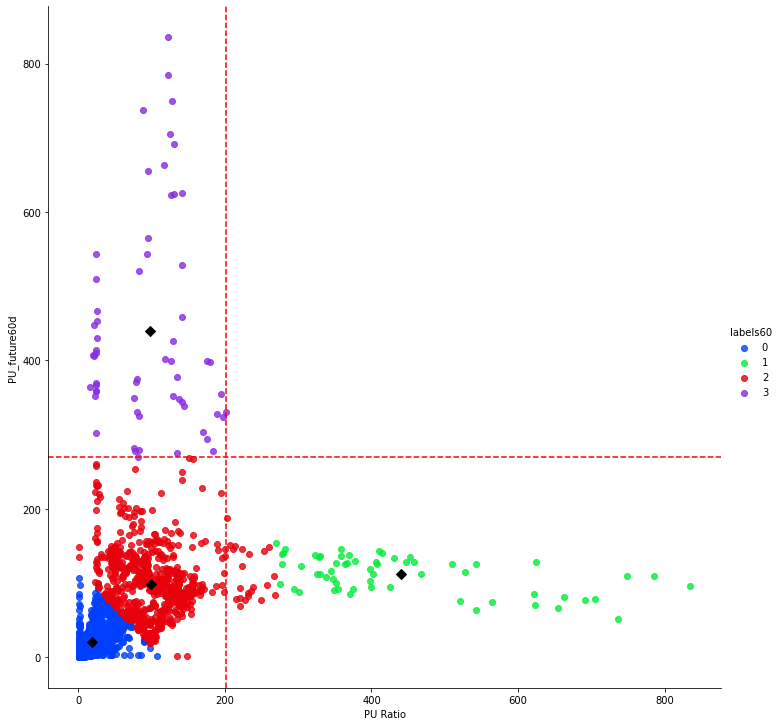

In [35]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future60d', data=df_60, hue='labels60', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.axvline(201.104188, color='red', linestyle='--')
plt.axhline(270.195448, color='red', linestyle='--')
plt.savefig('/content/drive/My Drive/CVML2021/PU90_full_annoted.png')

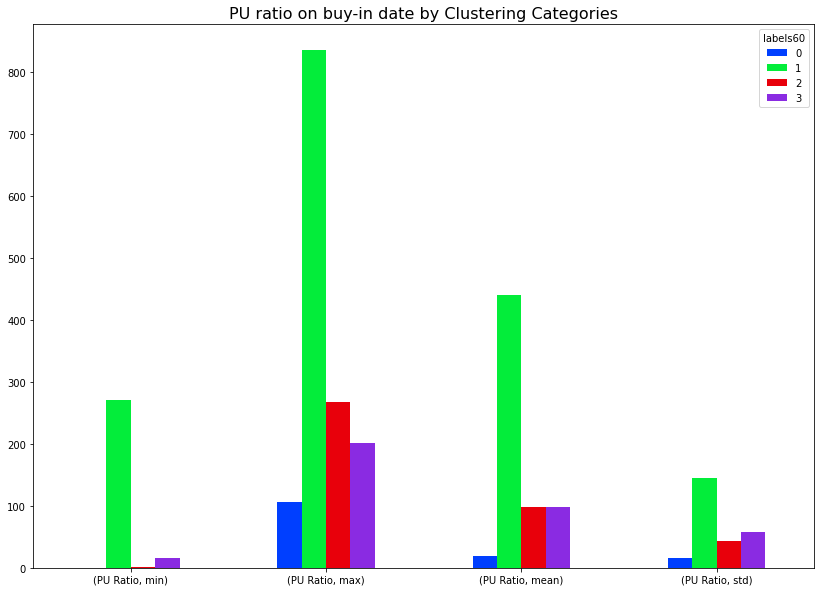

In [37]:
df60_PU.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60PU_full_buyin.png')

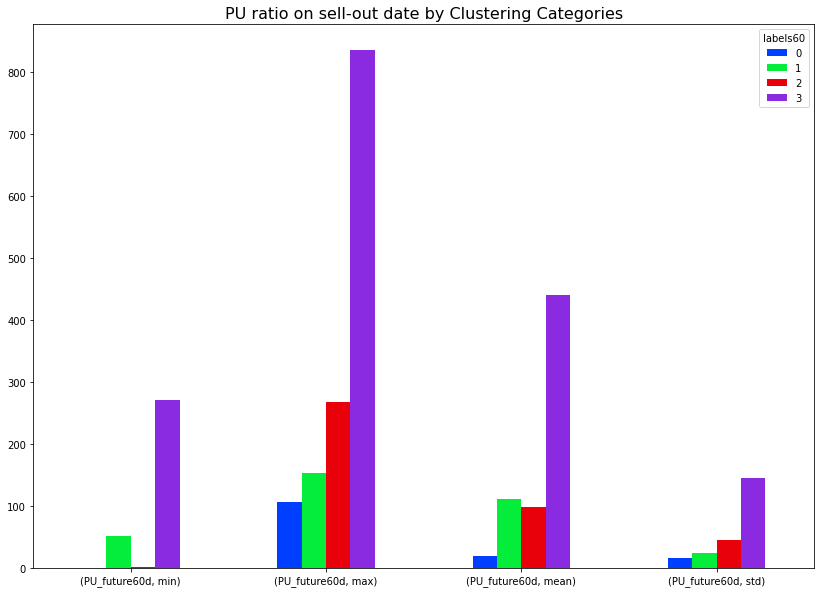

In [38]:
df60_PU.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60PU_full_sellout')

In [39]:
df_60_ROI=df_60_ROI.transpose()
df_60_ROI.columns=['labels60=0', 'labels60=1','labels60=2', 'labels60=3']
df_60_ROI.head()

,labels60=0,labels60=1,labels60=2,labels60=3
future60d_ROI_min,-80.651775,-59.784966,-72.993433,91.156702
future60d_ROI_max,3022.836529,20.531380,3854.704094,834.920849
future60d_ROI_mean,53.547982,-25.633132,27.919422,307.194035
future60d_ROI_std,188.368627,19.805913,211.739849,239.541938


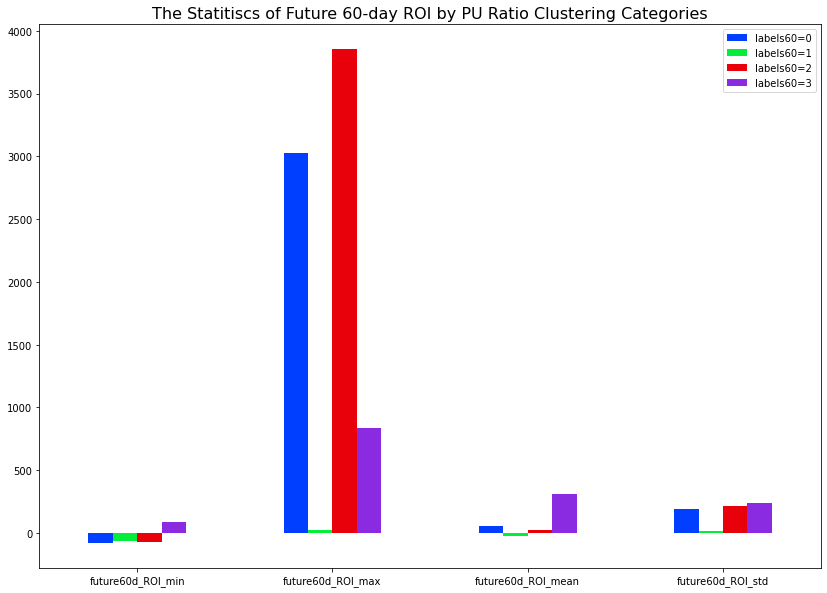

In [40]:
df_60_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 60-day ROI by PU Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/60ROI_full.png')

In [41]:
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d,labels60
2010-10-15,0.463068,0.845730,154.643925,127.697990,134.942857,30.998689,20.276851,0
2010-10-16,0.418963,0.790388,144.681892,123.638562,137.623762,11.602674,20.538081,0
2010-10-17,0.434969,0.848217,147.263082,128.368660,145.058824,18.085074,27.464631,0
2010-10-18,0.432914,0.783520,145.972987,124.403714,136.968570,11.418262,38.393389,0
2010-10-19,0.391364,0.752000,137.869691,122.980495,147.065731,4.899486,31.191718,0


In [42]:
### We cluster the data by NVT today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_60[['NVTAdj90','NVT_future60d']])
labels60_NVT = model.predict(df_60[['NVTAdj90','NVT_future60d']])
labels60_NVT.reshape(-1,1)
df_60['labels60_NVT']=labels60_NVT
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d,labels60,labels60_NVT
2010-10-15,0.463068,0.845730,154.643925,127.697990,134.942857,30.998689,20.276851,0,3
2010-10-16,0.418963,0.790388,144.681892,123.638562,137.623762,11.602674,20.538081,0,3
2010-10-17,0.434969,0.848217,147.263082,128.368660,145.058824,18.085074,27.464631,0,3
2010-10-18,0.432914,0.783520,145.972987,124.403714,136.968570,11.418262,38.393389,0,3
2010-10-19,0.391364,0.752000,137.869691,122.980495,147.065731,4.899486,31.191718,0,3


In [43]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,75.107241,78.833045
1,43.622821,43.277710
2,123.844414,181.433162
3,175.891545,79.324882


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

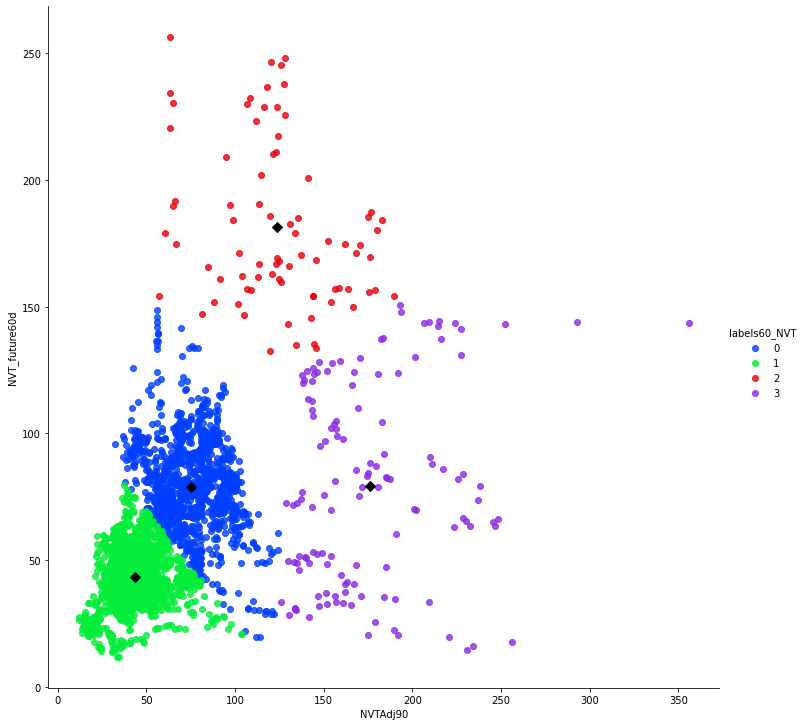

In [53]:
plt.figure(figsize=(14, 10))
sns.lmplot('NVTAdj90', 'NVT_future60d', data=df_60, hue='labels60_NVT', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('/content/drive/My Drive/CVML2021/NVT60_full.png')

In [46]:
df_60_ROI=df_60[['future60d_ROI','labels60_NVT']].groupby('labels60_NVT', as_index=False).agg(['min', 'max','mean','std'])
df_60_ROI.columns = ["_".join(x) for x in df_60_ROI.columns.ravel()]
df_60_ROI.index.name=None
df_60_ROI.head()

,future60d_ROI_min,future60d_ROI_max,future60d_ROI_mean,future60d_ROI_std
0,-59.784966,1926.199968,60.730670,206.760115
1,-80.651775,417.113760,24.214938,62.425391
2,21.771066,3854.704094,522.868718,829.205325
3,-72.993433,759.686249,95.399056,131.272074


In [47]:
df60_NVT=df_60[['NVTAdj90', 'NVT_future60d','labels60_NVT']].groupby('labels60_NVT').agg(['min', 'max','mean','std'])
df60_NVT=df60_NVT.transpose()
df60_NVT

labels60_NVT                 0           1           2           3
NVTAdj90      min    32.052603   11.810125   56.882797  125.725166
              max   124.258510  104.061573  189.442369  355.931337
              mean   75.059065   43.564106  123.844414  175.891545
              std    16.071974   12.639471   33.132443   38.571960
NVT_future60d min    19.666403   11.810125  132.630956   14.539792
              max   148.849739   79.561645  256.362055  150.802084
              mean   78.735448   43.239104  181.433162   79.324882
              std    17.510526   10.816800   31.819462   38.982405

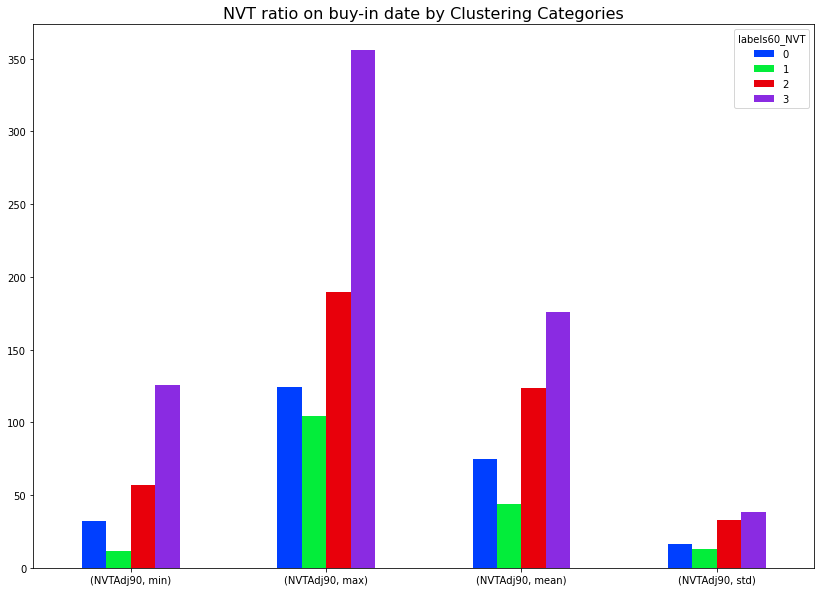

In [48]:
df60_NVT.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60NVT_full_buyin')

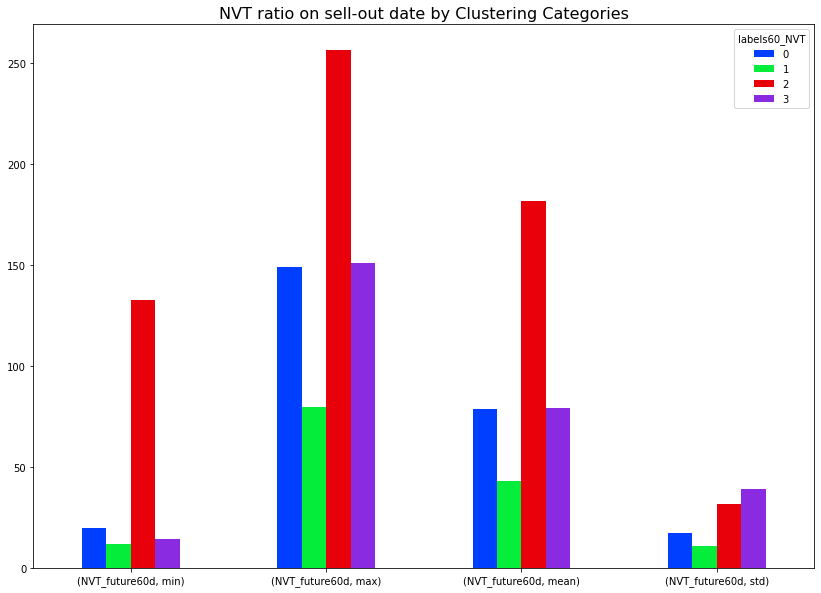

In [49]:
df60_NVT.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60NVT_full_sellout')

In [50]:
df_60_ROI=df_60_ROI.transpose()
df_60_ROI.columns=['labels60_NVT=0', 'labels60_NVT=1','labels60_NVT=2', 'labels60_NVT=3']
df_60_ROI.head()

,labels60_NVT=0,labels60_NVT=1,labels60_NVT=2,labels60_NVT=3
future60d_ROI_min,-59.784966,-80.651775,21.771066,-72.993433
future60d_ROI_max,1926.199968,417.113760,3854.704094,759.686249
future60d_ROI_mean,60.730670,24.214938,522.868718,95.399056
future60d_ROI_std,206.760115,62.425391,829.205325,131.272074


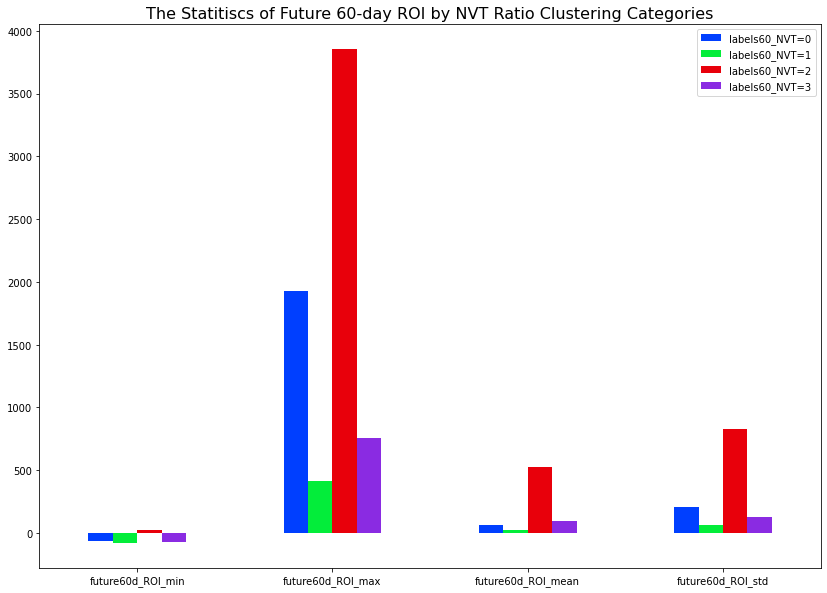

In [52]:
df_60_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 60-day ROI by NVT Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/60ROI_full_NVT.png')

In [54]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_60[['PM','PM_future60d']])
labels60 = model.predict(df_60[['PM','PM_future60d']])
labels60.reshape(-1,1)
df_60['labels60']=labels60
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d,labels60,labels60_NVT
2010-10-15,0.463068,0.845730,154.643925,127.697990,134.942857,30.998689,20.276851,3,3
2010-10-16,0.418963,0.790388,144.681892,123.638562,137.623762,11.602674,20.538081,3,3
2010-10-17,0.434969,0.848217,147.263082,128.368660,145.058824,18.085074,27.464631,3,3
2010-10-18,0.432914,0.783520,145.972987,124.403714,136.968570,11.418262,38.393389,3,3
2010-10-19,0.391364,0.752000,137.869691,122.980495,147.065731,4.899486,31.191718,3,3


In [55]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,1.436411,1.358239
1,105.480729,18.328206
2,49.413009,20.084789
3,19.072083,11.762278


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

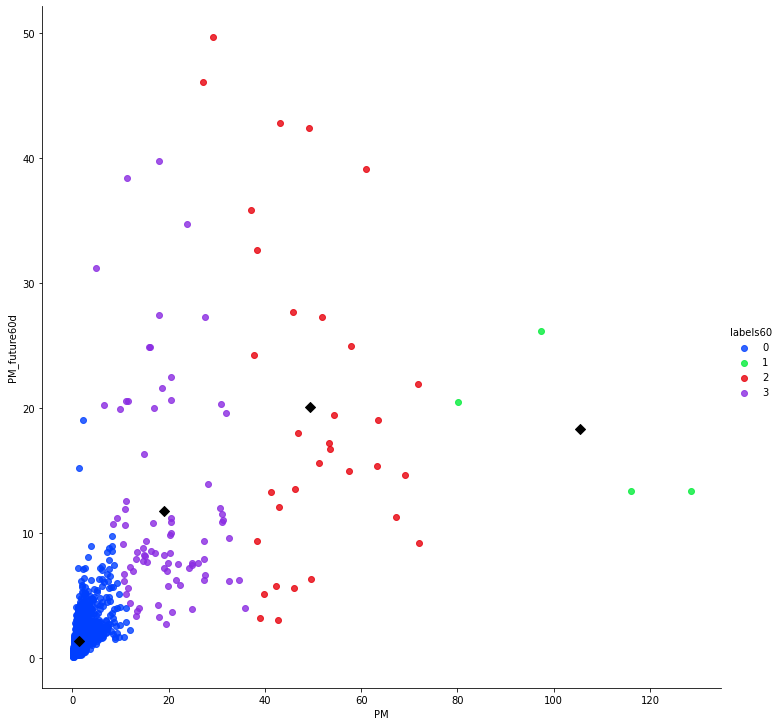

In [58]:
plt.figure(figsize=(14, 10))
sns.lmplot('PM','PM_future60d', data=df_60, hue='labels60', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('/content/drive/My Drive/CVML2021/PM60_full.png')

In [59]:
df_60_ROI=df_60[['future60d_ROI','labels60']].groupby('labels60', as_index=False).agg(['min', 'max','mean','std'])
df_60_ROI.columns = ["_".join(x) for x in df_60_ROI.columns.ravel()]
df_60_ROI.index.name=None
df_60_ROI.head()

,future60d_ROI_min,future60d_ROI_max,future60d_ROI_mean,future60d_ROI_std
0,-80.651775,3854.704094,47.697434,197.063196
1,-25.453991,54.798762,16.655736,32.942402
2,-20.036981,350.000000,93.346815,117.761654
3,-27.842464,810.483046,178.224811,139.036262


In [60]:
df60_PM=df_60[['PM','PM_future60d','labels60']].groupby('labels60').agg(['min', 'max','mean','std'])
df60_PM=df60_PM.transpose()
df60_PM

labels60                   0           1          2          3
PM           min    0.081659   80.100067  27.230168   4.899486
             max   11.943117  128.418139  71.973830  35.803533
             mean   1.436411  105.480729  49.413009  19.072083
             std    1.351066   21.176344  11.648763   7.294767
PM_future60d min    0.081659   13.338470   3.010047   2.681570
             max   19.008926   26.154253  49.639999  39.772841
             mean   1.358239   18.328206  20.084789  11.762278
             std    1.170923    6.204667  13.085277   8.242682

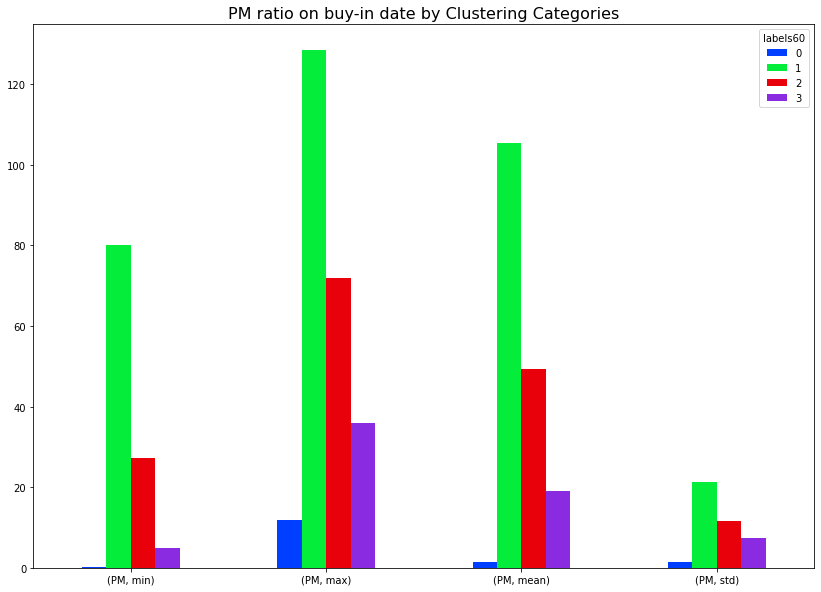

In [61]:
df60_PM.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60PM_full_buyin')

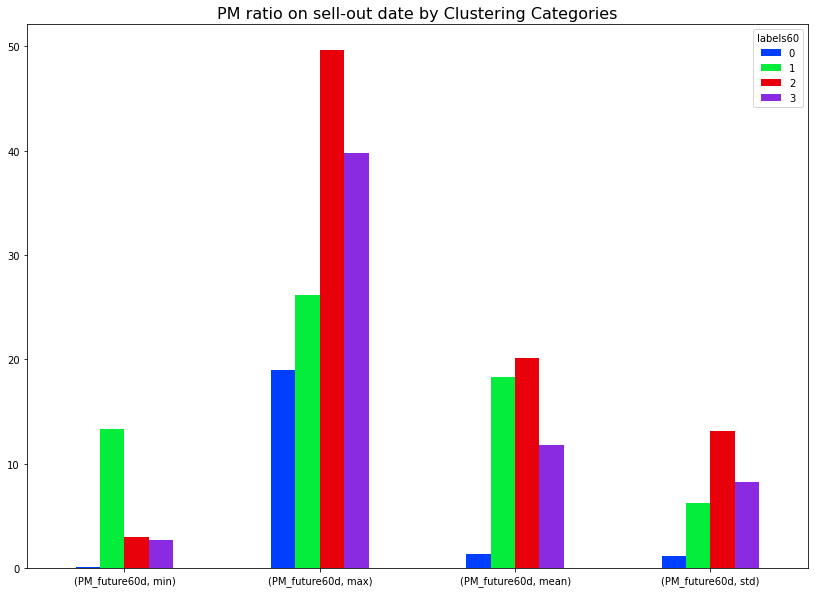

In [62]:
df60_PM.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60PM_full_sell-out')

In [63]:
df_60_ROI=df_60_ROI.transpose()
df_60_ROI.columns=['labels60=0', 'labels60=1','labels60=2', 'labels60=3']
df_60_ROI.head()

,labels60=0,labels60=1,labels60=2,labels60=3
future60d_ROI_min,-80.651775,-25.453991,-20.036981,-27.842464
future60d_ROI_max,3854.704094,54.798762,350.000000,810.483046
future60d_ROI_mean,47.697434,16.655736,93.346815,178.224811
future60d_ROI_std,197.063196,32.942402,117.761654,139.036262


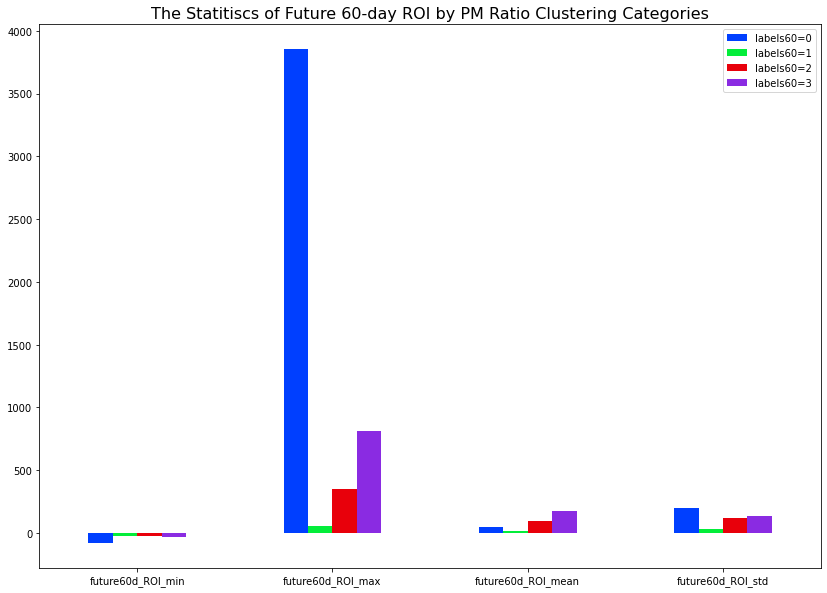

In [64]:
df_60_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 60-day ROI by PM Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/60ROI_fullPM.png')

In [65]:
df.to_csv('/content/drive/My Drive/CVML2021/btc_Kmeans_robust60_2020_12_31.csv')